In [1]:
!pip3 install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

[[1.658985, 4.285136], [-3.453687, 3.424321], [4.838138, 1.151539], [-5.379713, -3.362104], [0.972564, 2.924086], [-3.567919, 1.531611], [0.450614, -3.302219], [-3.487105, -1.724432], [2.668759, 1.594842], [-3.156485, 3.191137], [3.165506, -3.999838], [-2.786837, -3.099354], [4.208187, 2.984927], [-2.123337, 2.943366], [0.704199, -0.479481], [-0.39237, -3.963704], [2.831667, 1.574018], [-0.790153, 3.343144], [2.943496, -3.357075], [-3.195883, -2.283926], [2.336445, 2.875106], [-1.786345, 2.554248], [2.190101, -1.90602], [-3.403367, -2.778288], [1.778124, 3.880832], [-1.688346, 2.230267], [2.592976, -2.054368], [-4.007257, -3.207066], [2.257734, 3.387564], [-2.679011, 0.785119], [0.939512, -4.023563], [-3.674424, -2.261084], [2.046259, 2.735279], [-3.18947, 1.780269], [4.372646, -0.822248], [-2.579316, -3.497576], [1.889034, 5.1904], [-0.798747, 2.185588], [2.83652, -2.658556], [-3.837877, -3.253815], [2.096701, 3.886007], [-2.709034, 2.923887], [3.367037, -3.184789], [-2.121479, -4.232

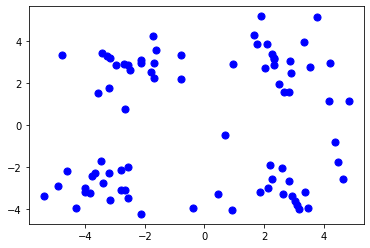

In [3]:
# x = -1 * np.random.rand(100,2)
# x1 = np.random.rand(50, 2)
# # x = np.random.uniform(low=-1, high=1, size=(100,2))
# x[50:100, :] = x1

x = []

with open('data.txt', 'r') as file:
    data = file.read()
    lines = data.split("\n")
    for line in lines:
        split = line.split("	")
        x.append([float(split[0].rstrip()), float(split[1].rstrip())])
        
print(x)
x = np.asarray(x)
    

plt.scatter(x[:,0], x[:,1], s=50, color='b')
plt.show()

In [4]:
class KMeans():
  def __init__(self, n_clusters, data):
    self.k = n_clusters
    self.x = data
  
    self.centroids = np.random.uniform(low=-4, high=4, size=(self.k,2))

    self.labels = self.genLabels()
    
    self.colors = {0:'red', 1:'blue', 2:'green', 3:'black'}

  def dist(self, p, q):
    return math.sqrt(math.pow((p[0]-q[0]),2) + math.pow((p[1]-q[1]),2))
  
  def classify(self, p):
    return np.argmin([self.dist(p, centroid) for centroid in self.centroids])
    
  def genLabels(self):
    return [self.classify(p) for p in self.x]

  def fit(self, epochs, step):
    for epoch in range(0, epochs):
      for i, centroid in enumerate(self.centroids):
        avgX, avgY = 0, 0
        c = self.labels.count(i)

        for j, p in enumerate(x):
          if self.labels[j] == i:
            avgX += p[0] - centroid[0]
            avgY += p[1] - centroid[1]

        self.centroids[i][0] += (avgX/c)*step
        self.centroids[i][1] += (avgY/c)*step
      
      self.labels = self.genLabels()
      self.showPlot(classification=True, name=epoch)      

  def showPlot(self, classification=False, name="plot"):
    plt.figure(1, figsize = (10,10))
    
    if classification:
      for i, p in enumerate(self.x):
       plt.scatter(p[0], p[1], color=self.colors[self.labels[i]])
      
      for i, centroid in enumerate(self.centroids):
        plt.scatter(centroid[0], centroid[1], color=self.colors[i], s=100, marker="x")

    else:
      plt.scatter(self.x[:,0], self.x[:,1], color='blue')

      plt.scatter(self.centroids[:,0], self.centroids[:,1], color="red", s=100)

    plt.show()
    

  
  def printCentroids(self):
    print(self.centroids)


[[ 2.0132607   0.47747728]
 [-1.04412718  3.3624382 ]
 [ 0.80780206  3.82461193]
 [ 0.03218062  2.97603915]]


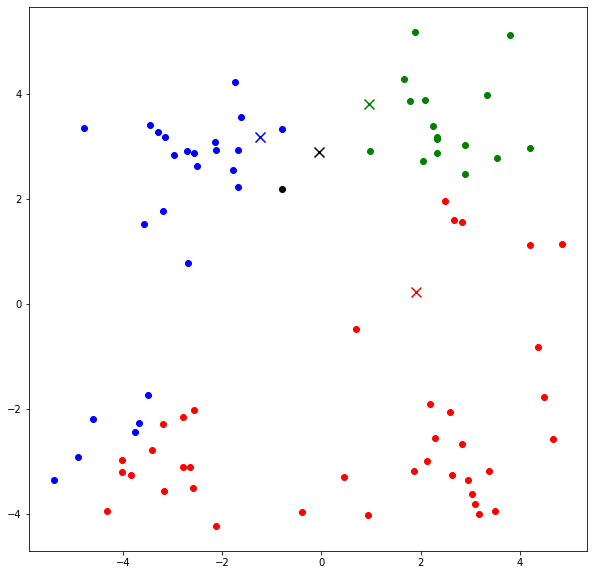

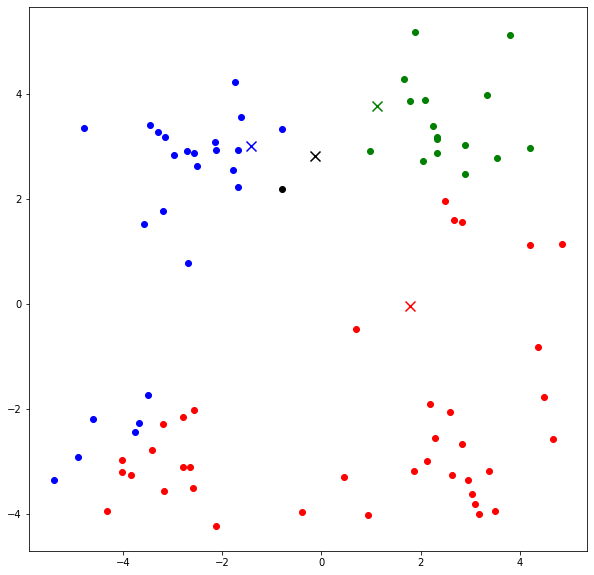

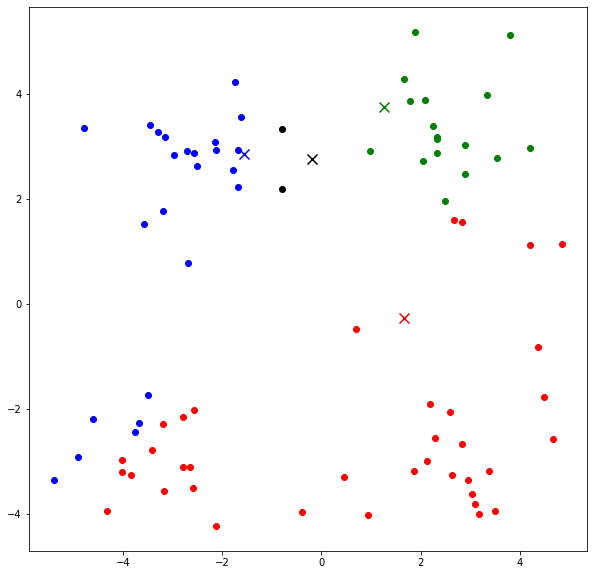

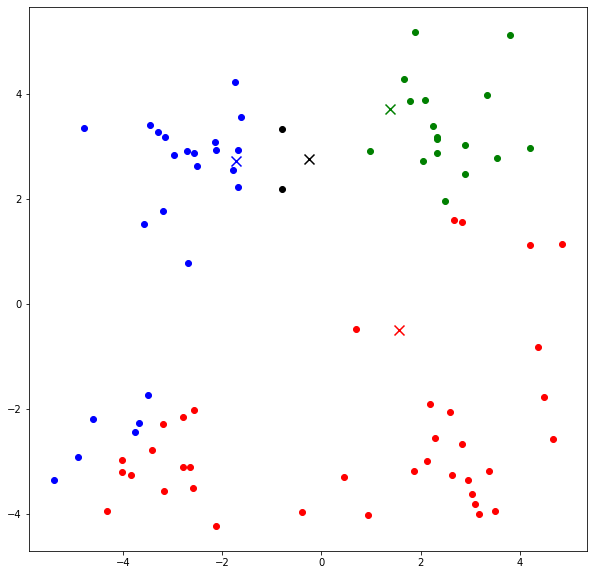

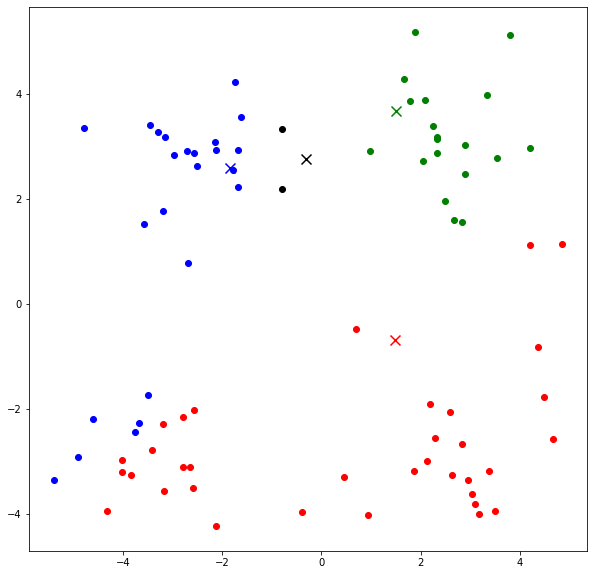

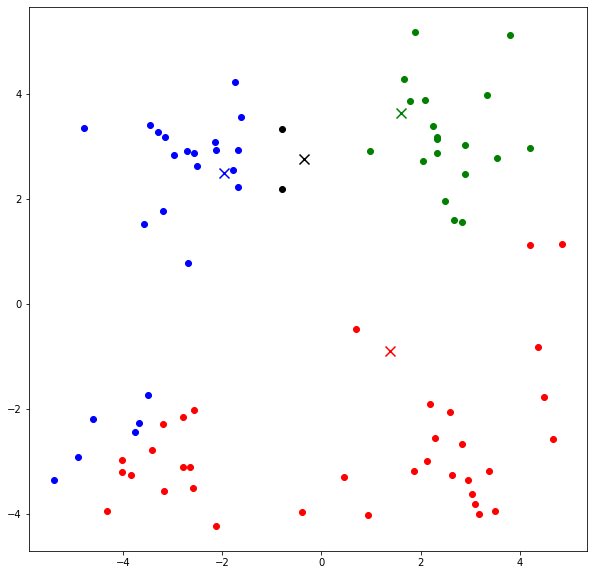

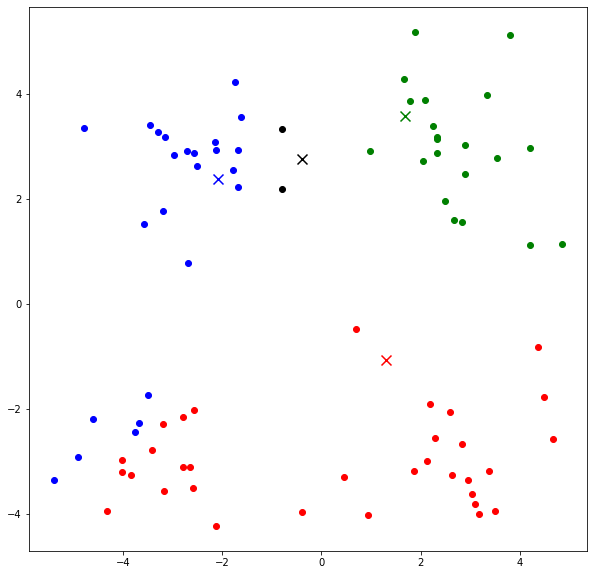

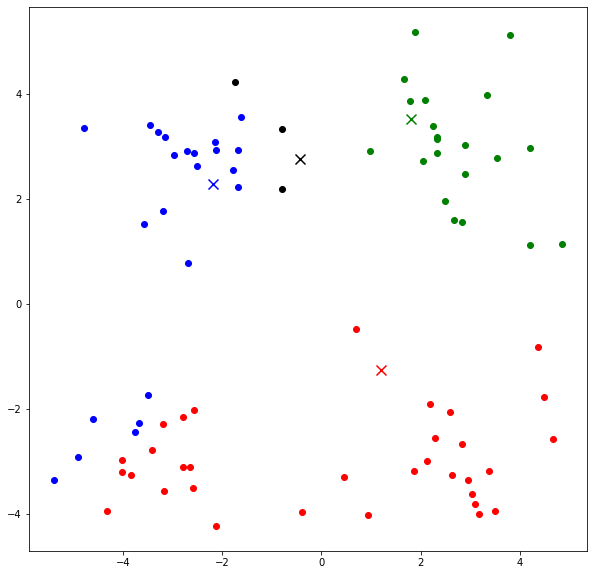

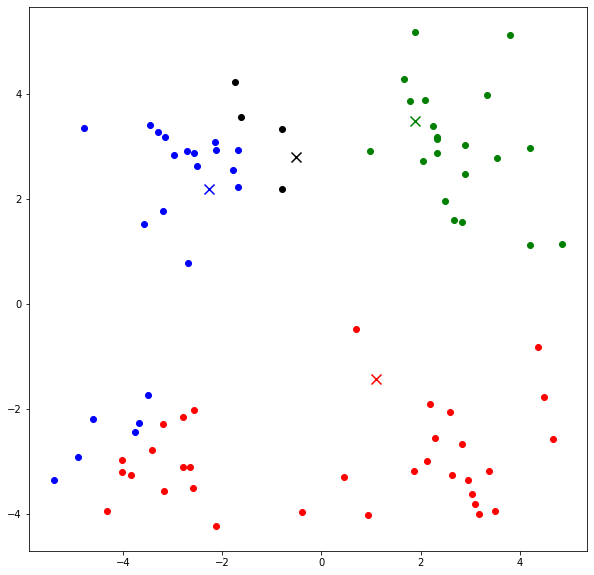

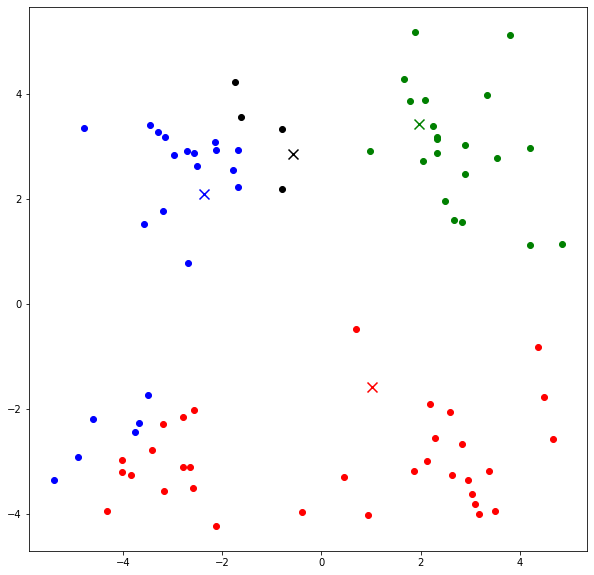

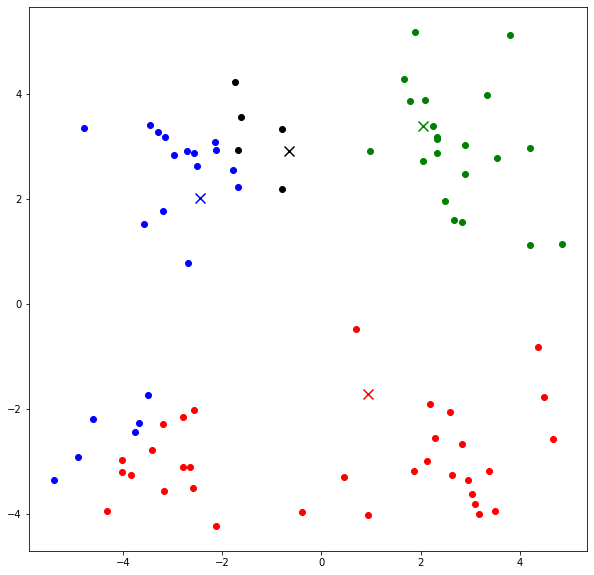

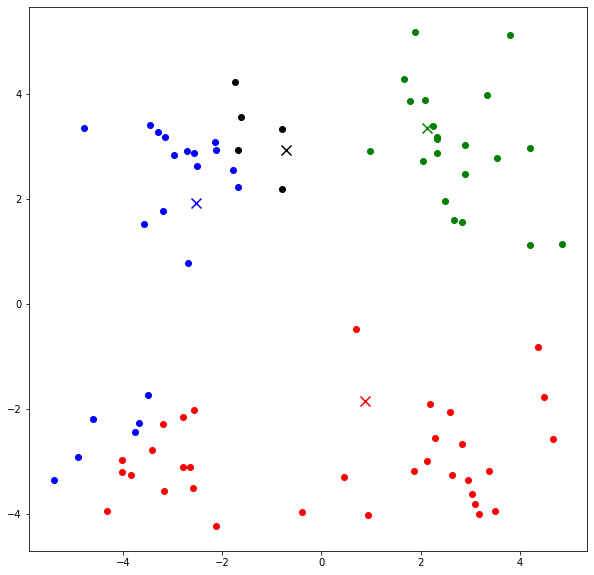

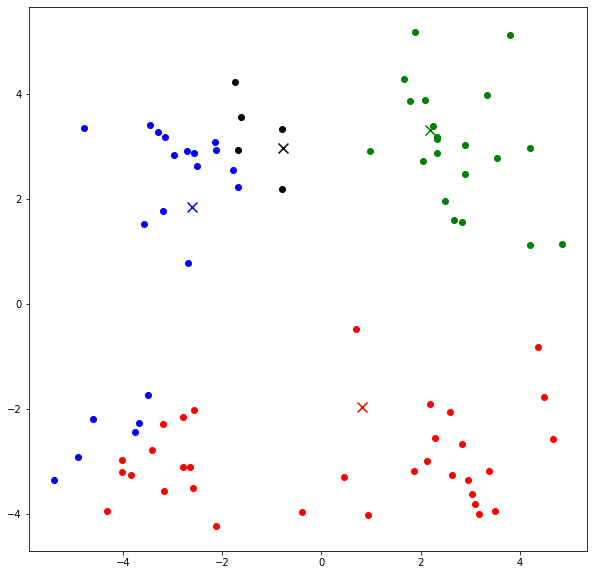

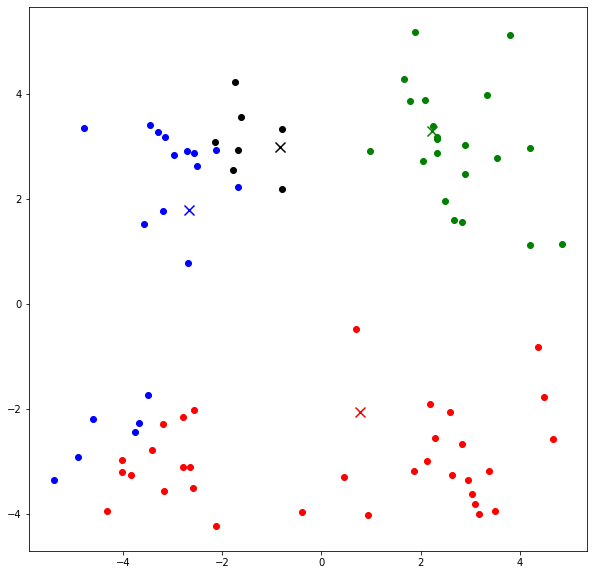

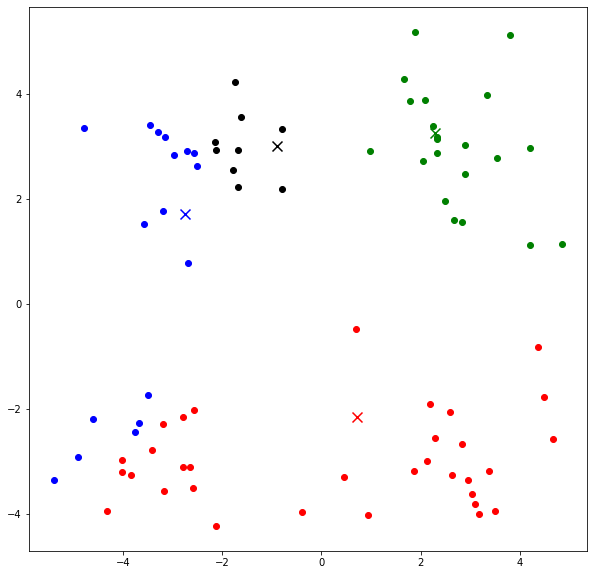

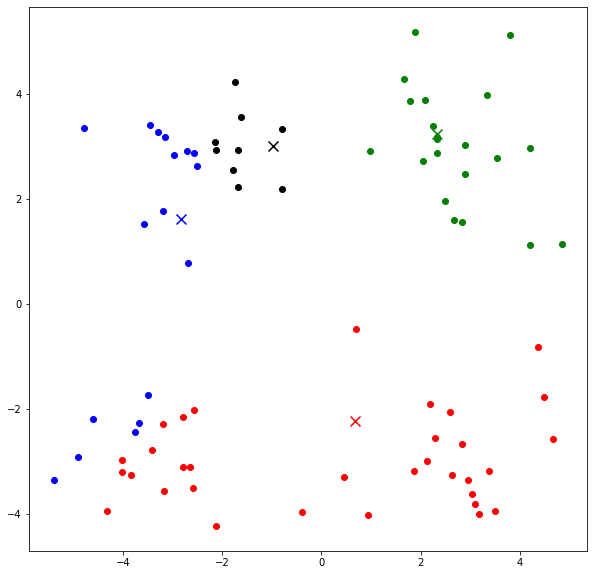

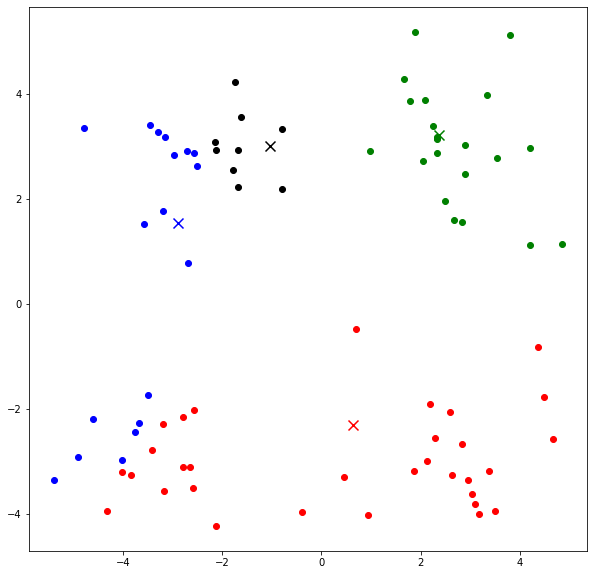

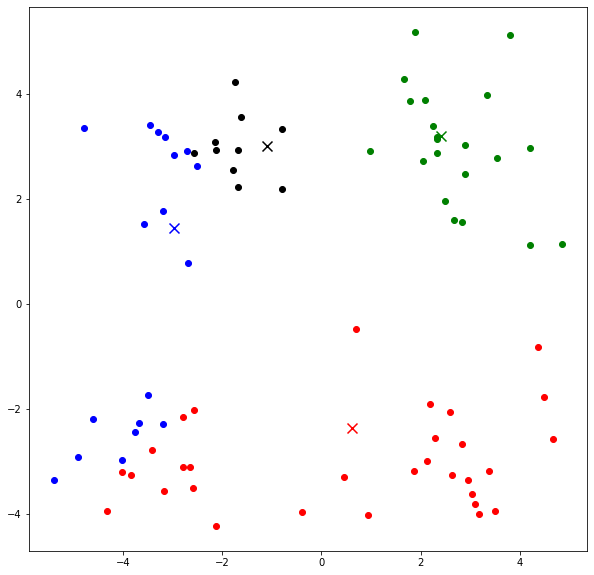

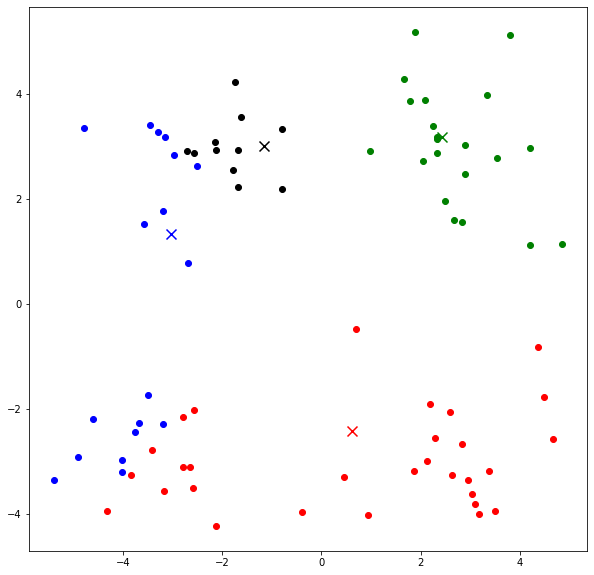

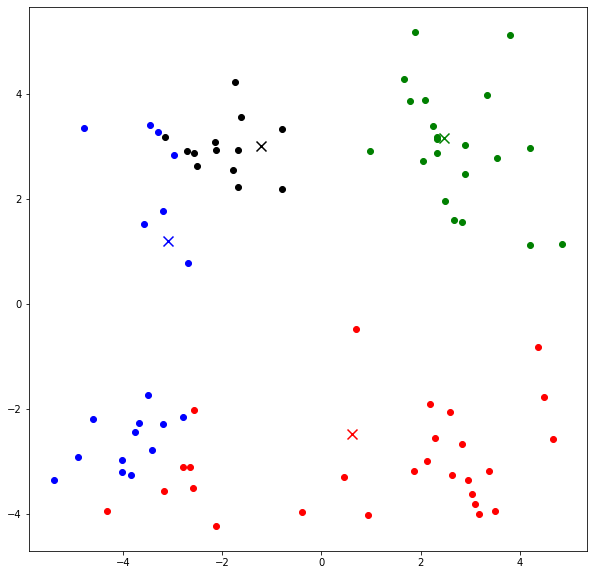

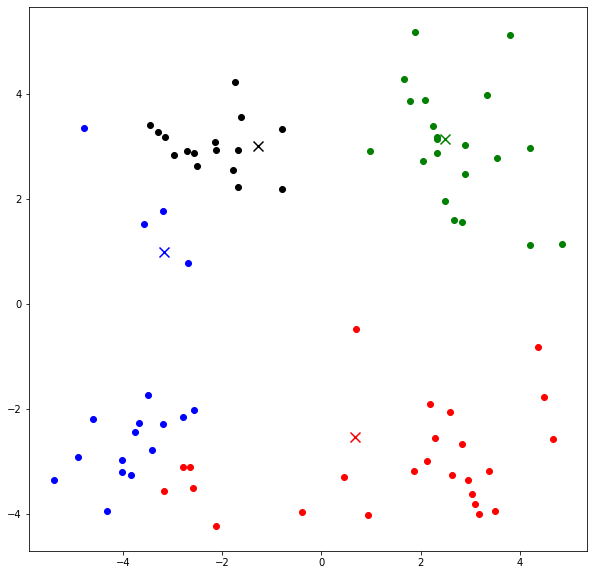

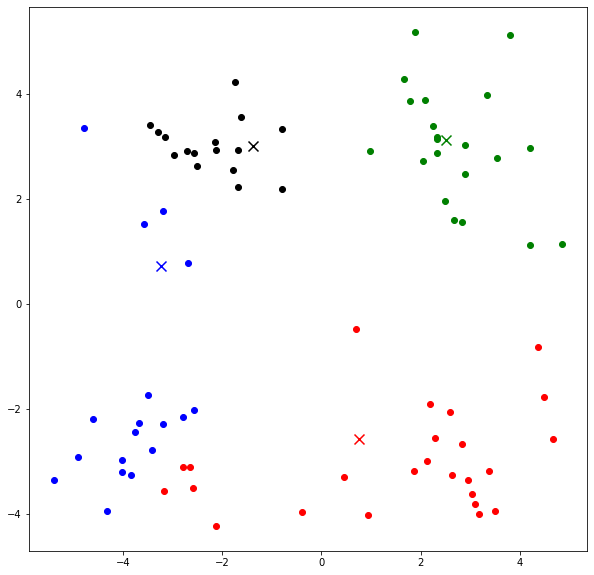

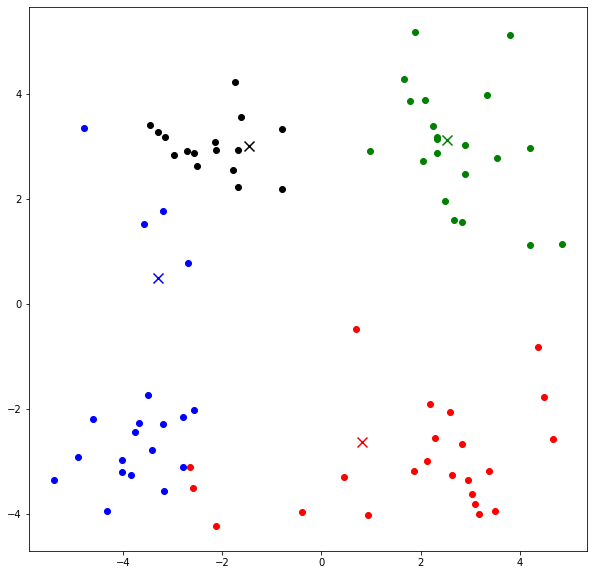

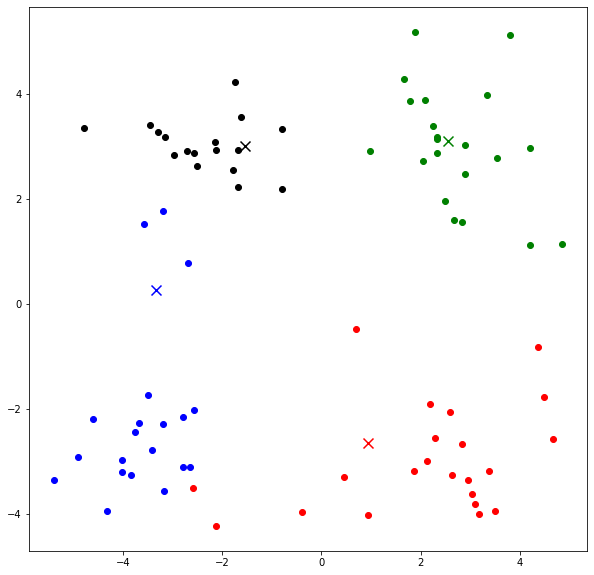

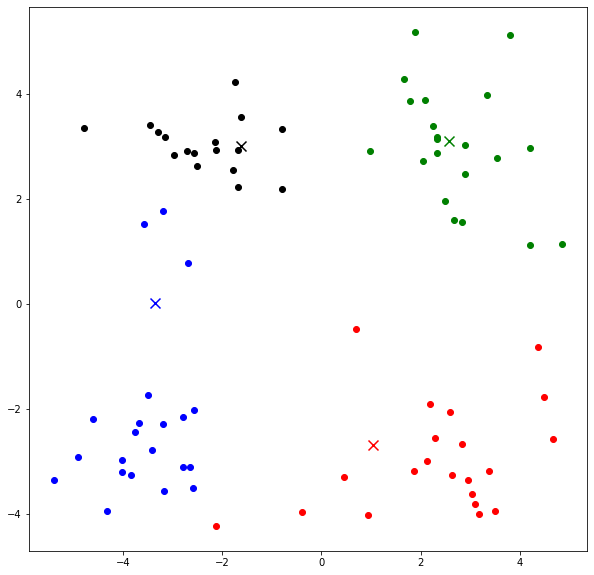

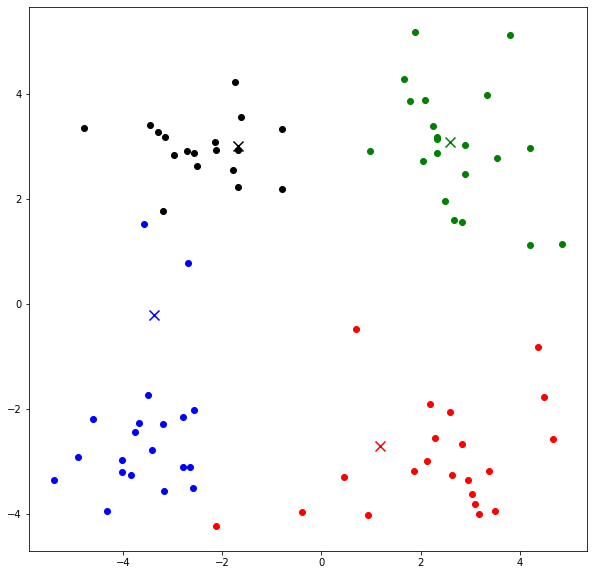

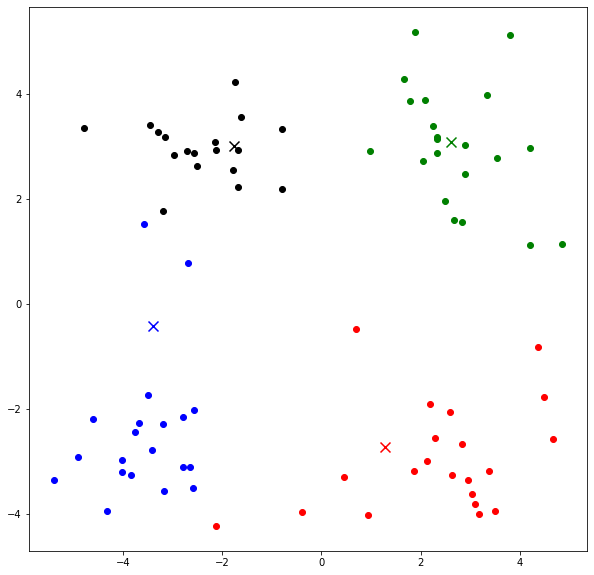

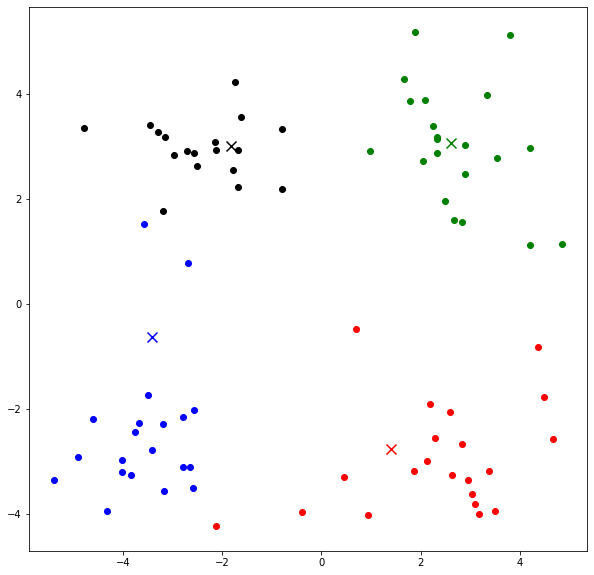

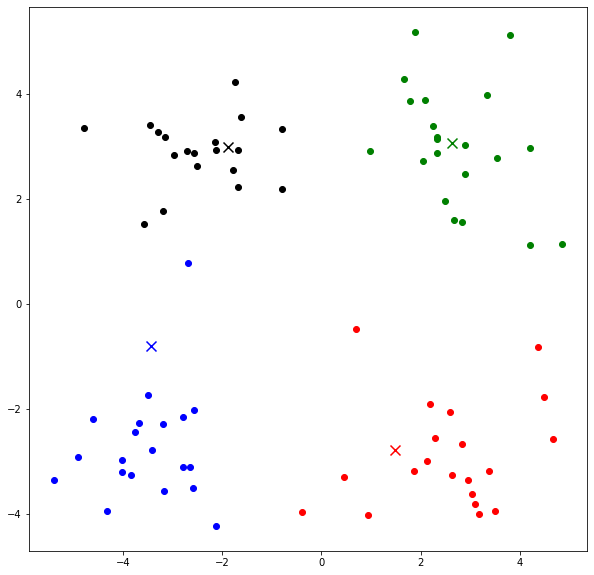

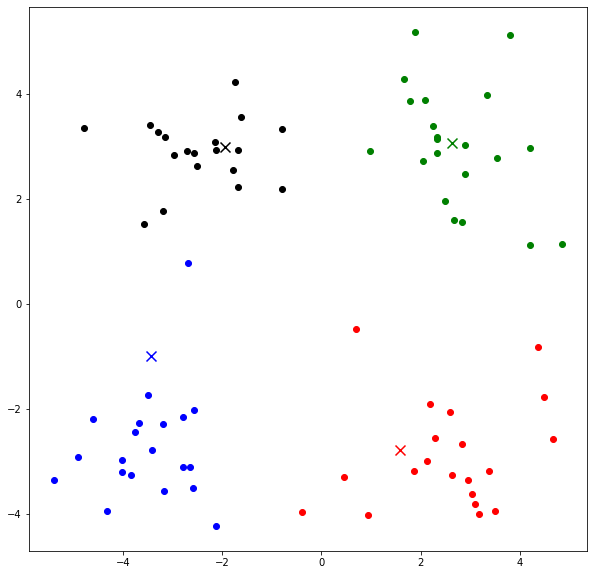

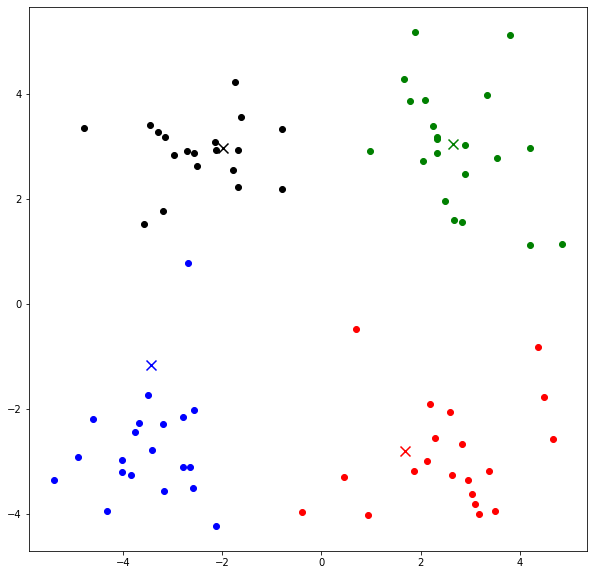

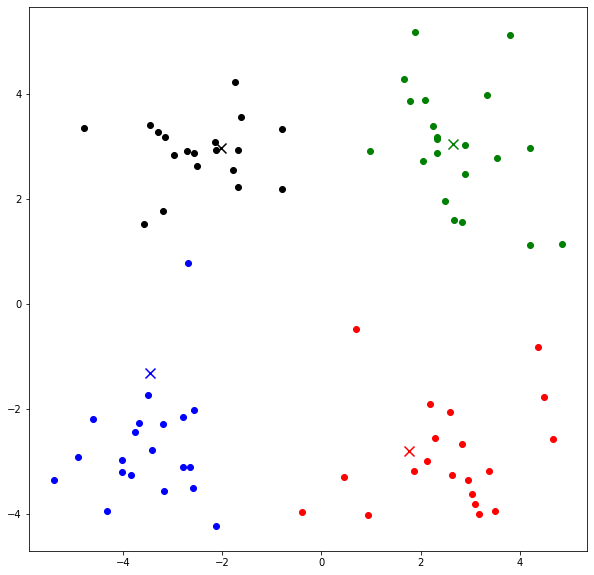

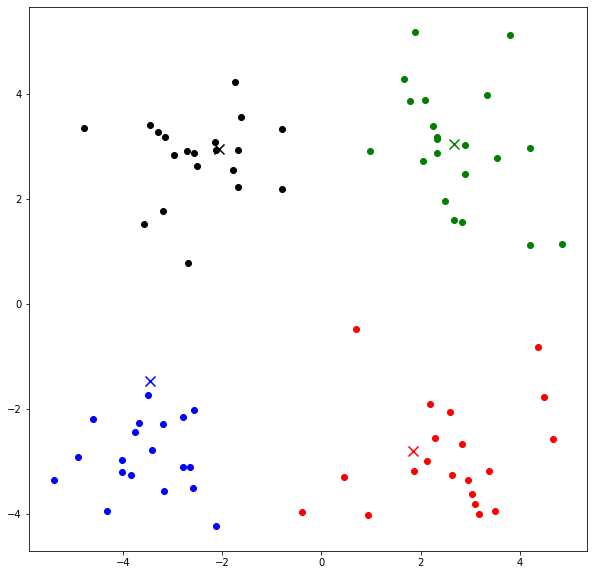

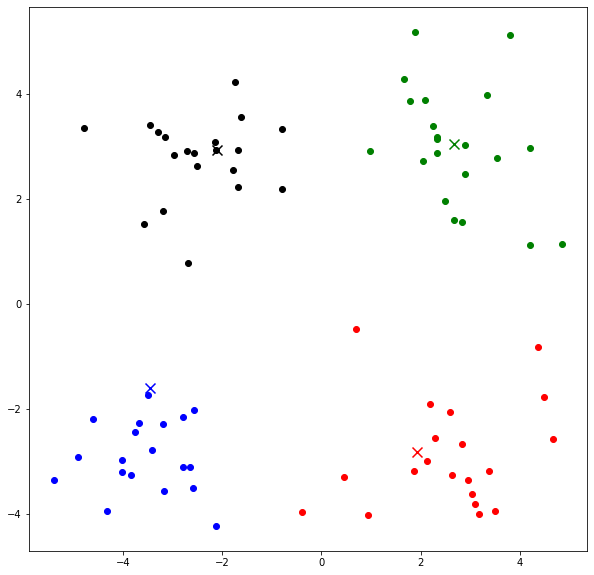

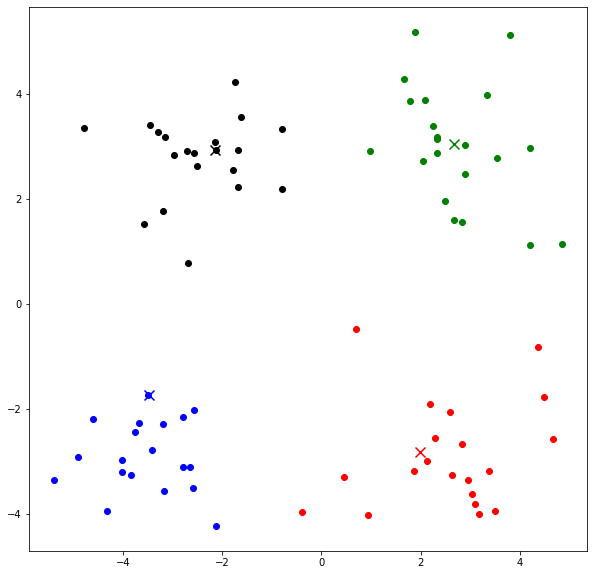

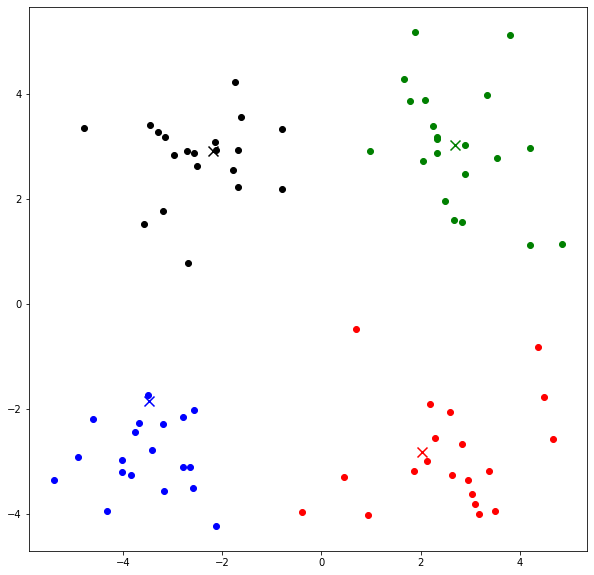

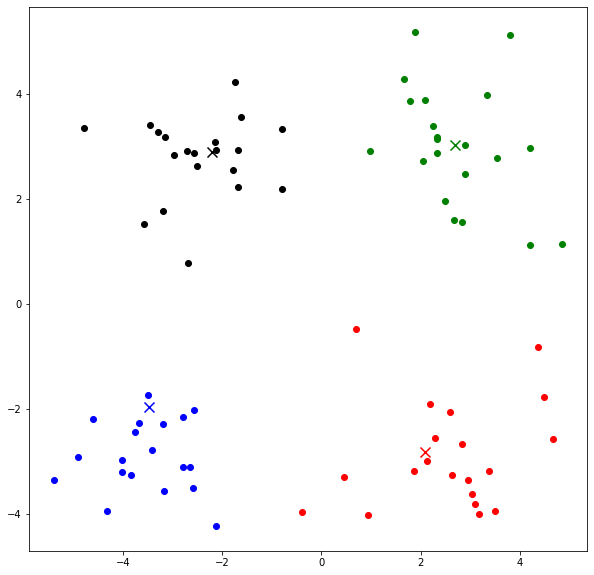

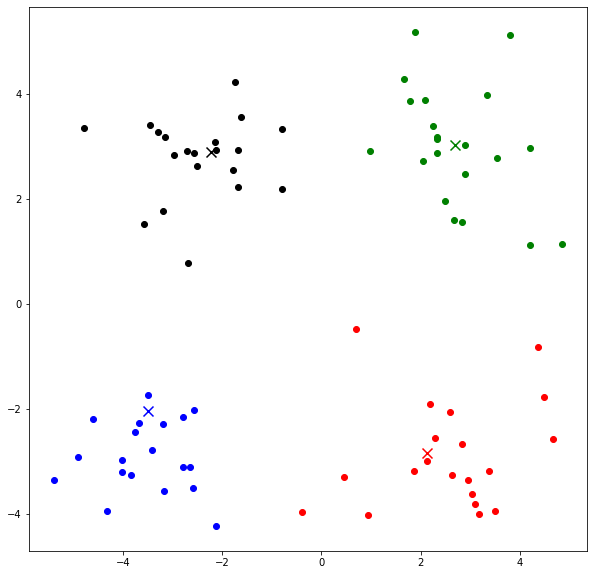

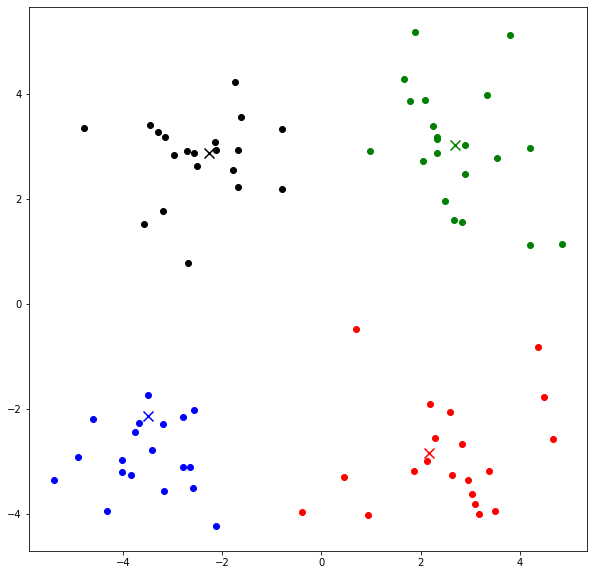

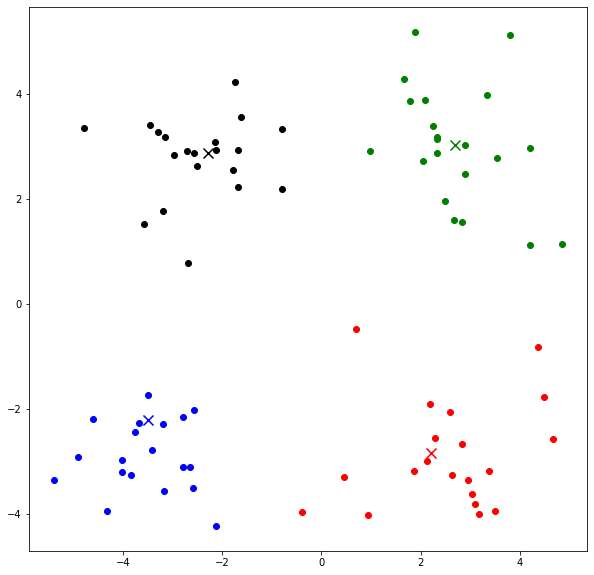

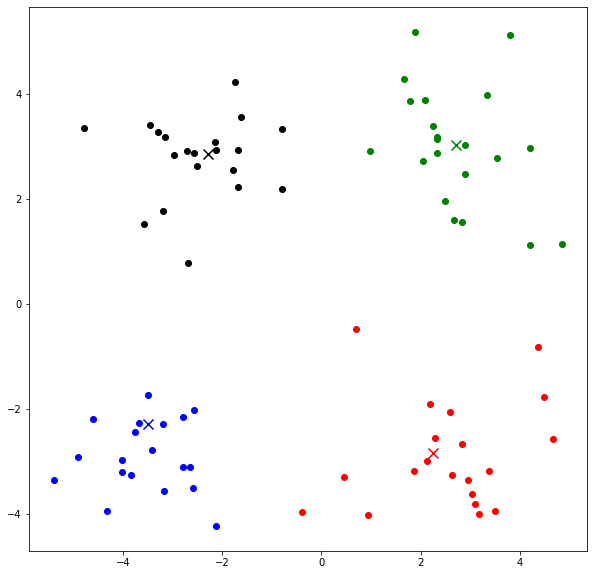

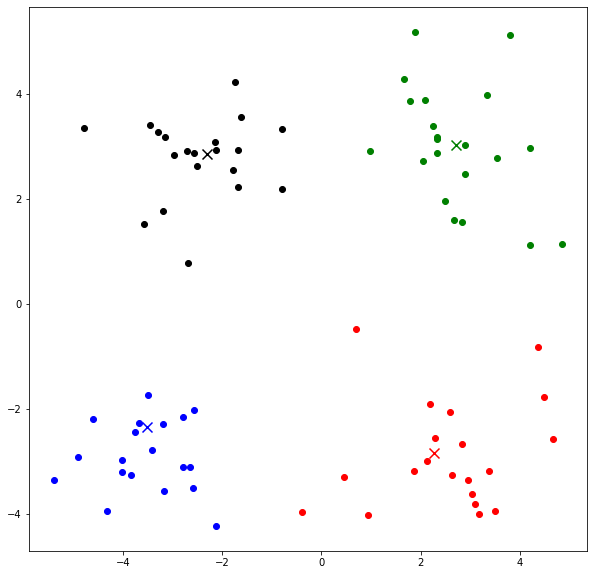

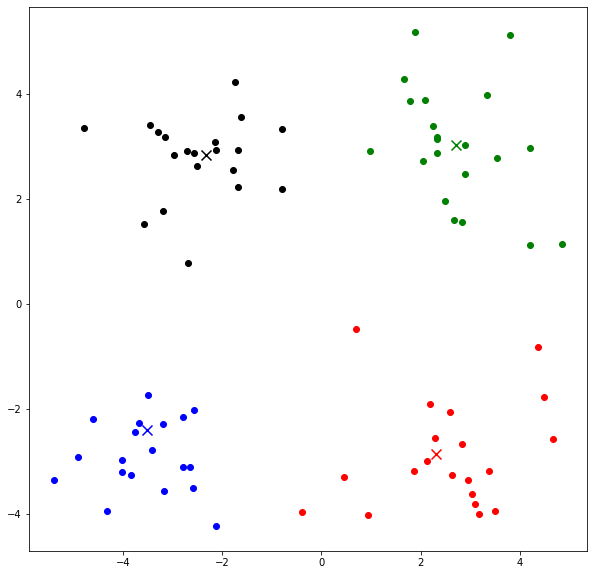

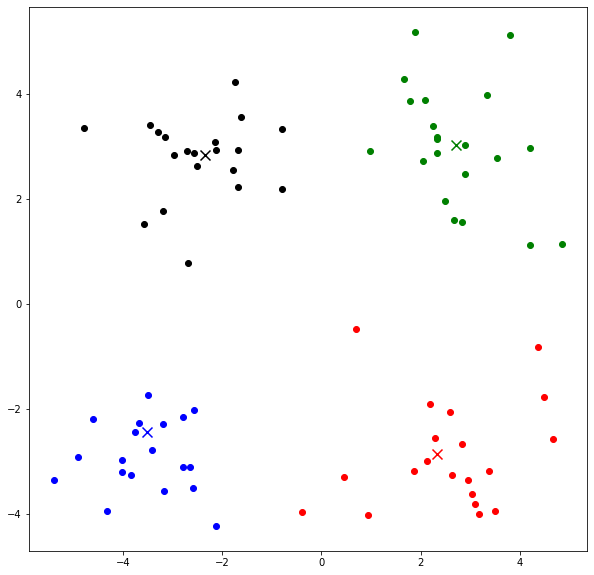

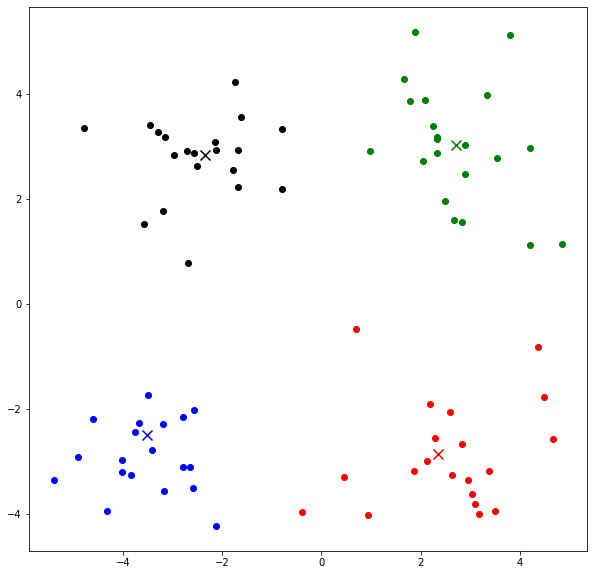

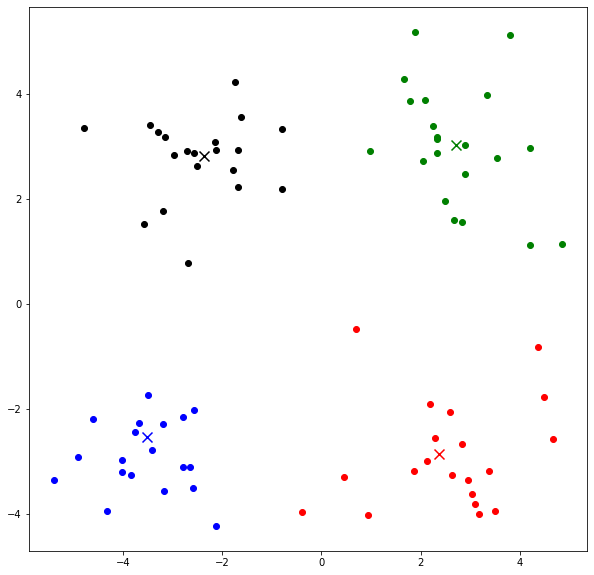

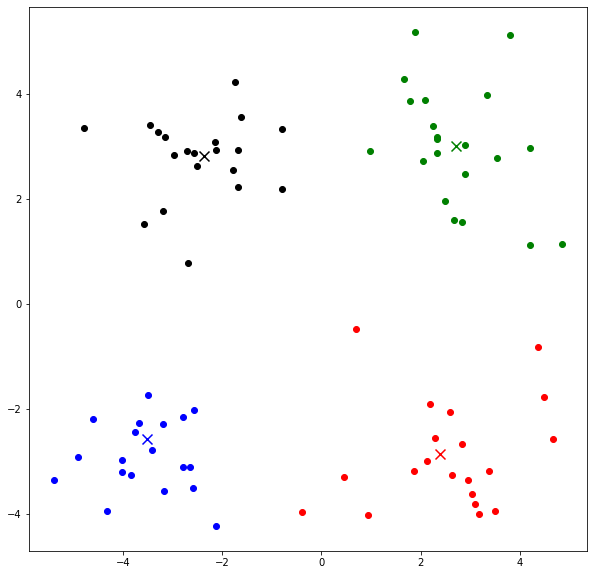

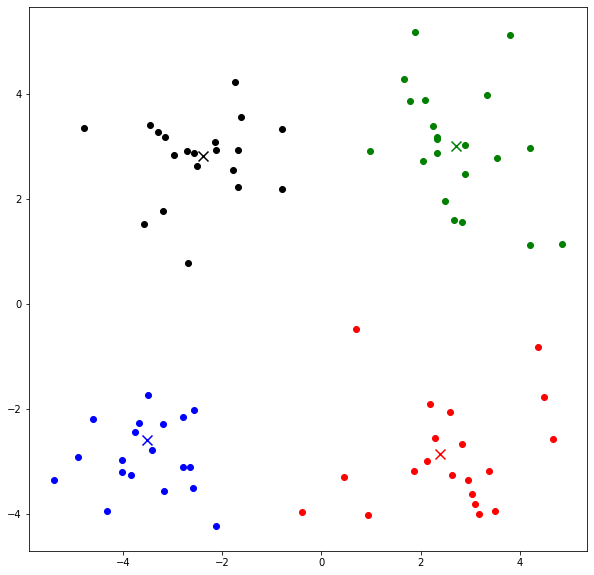

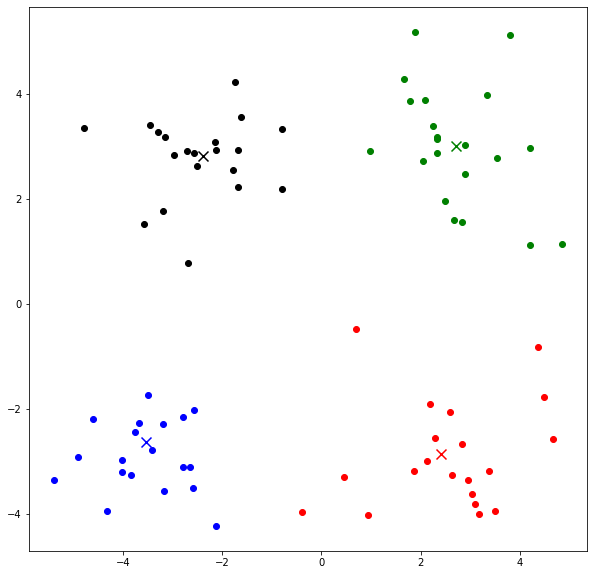

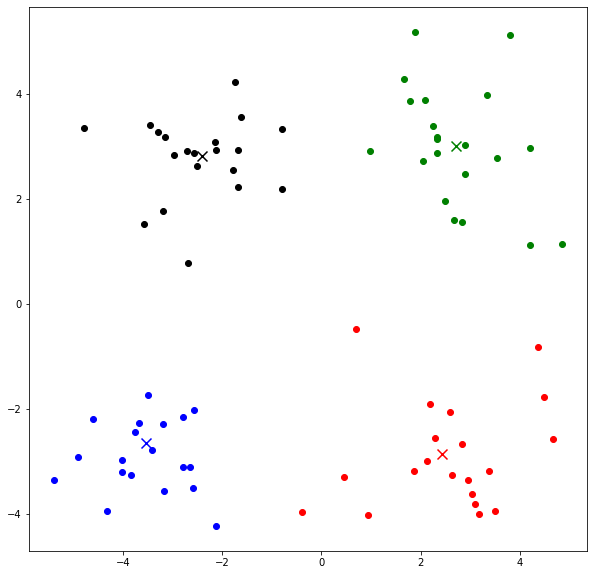

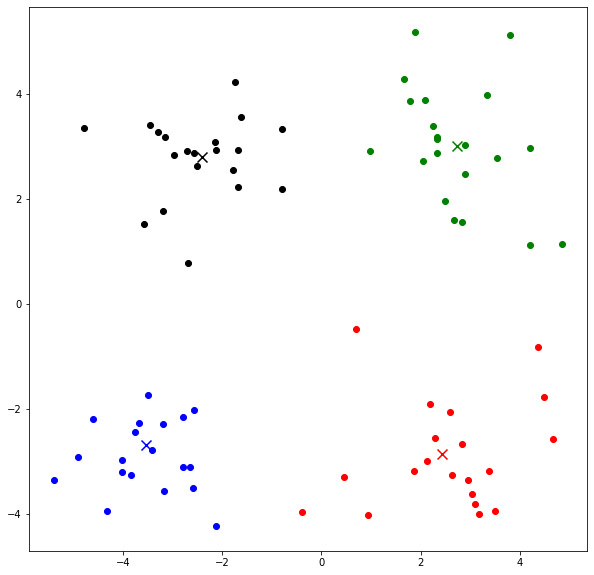

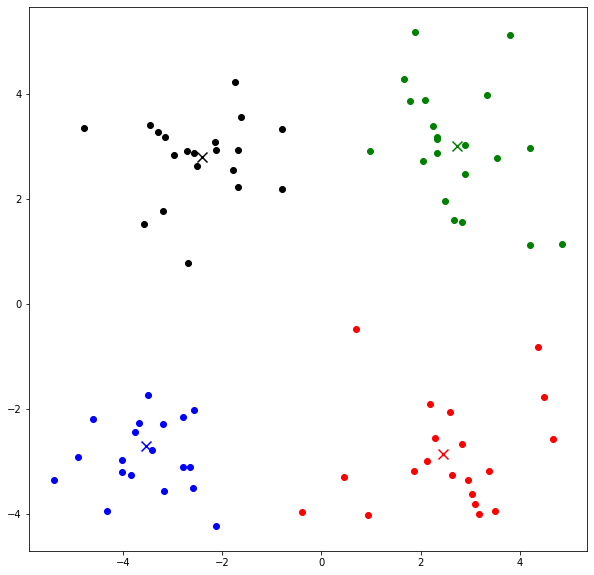

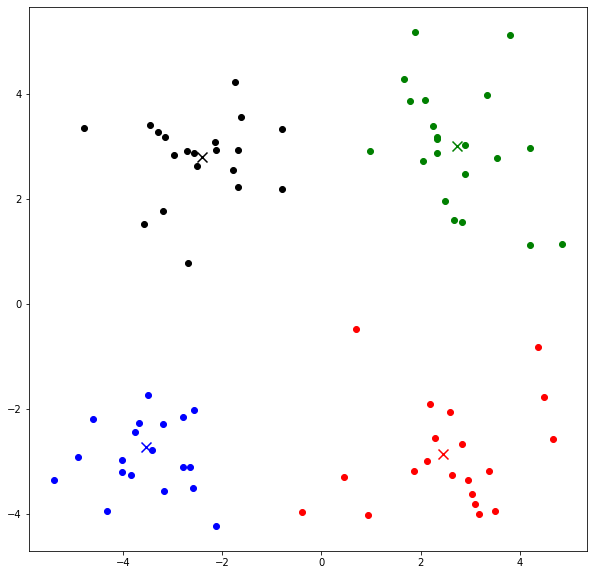

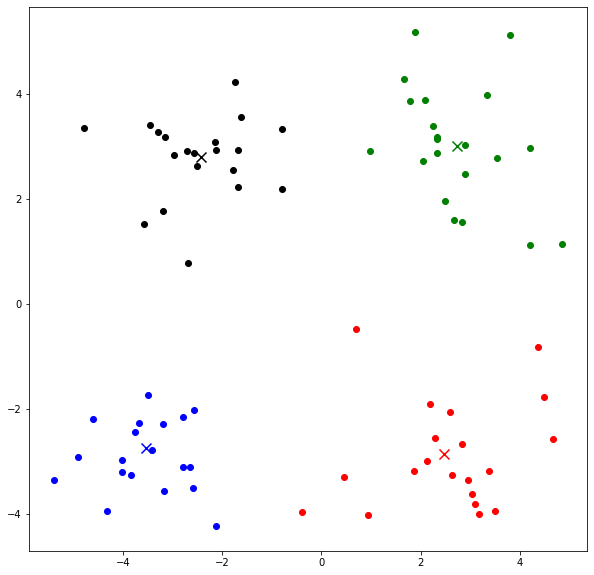

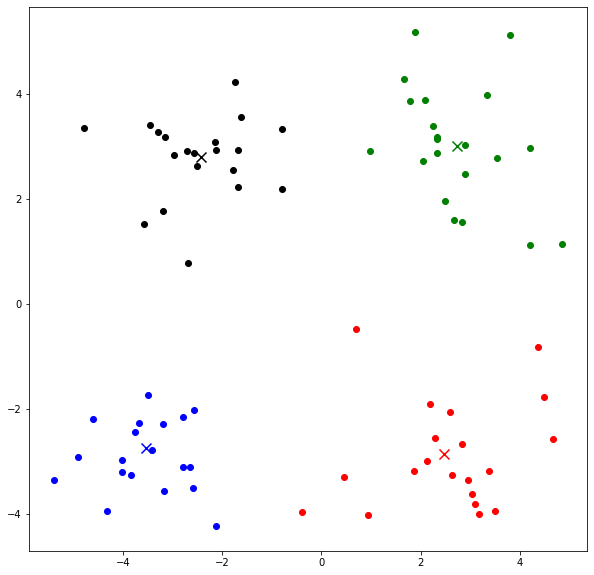

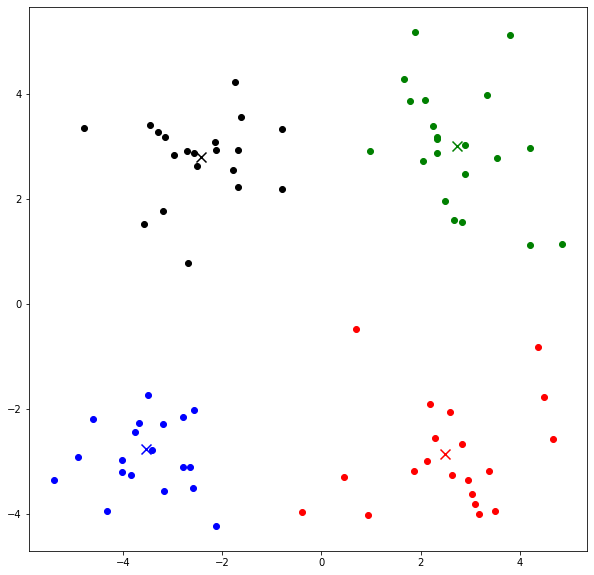

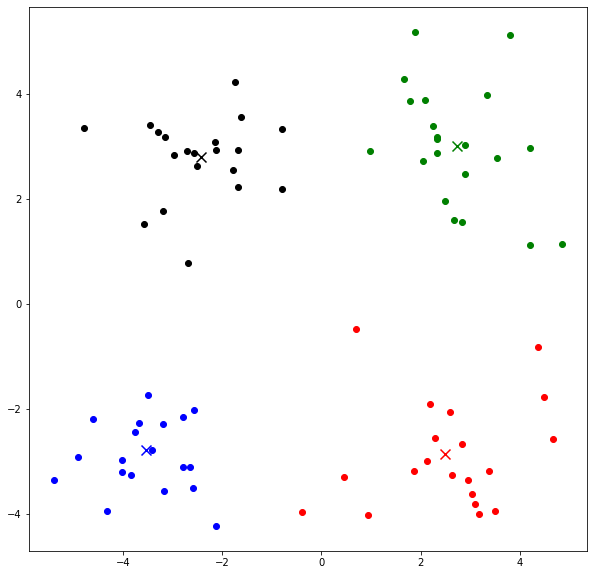

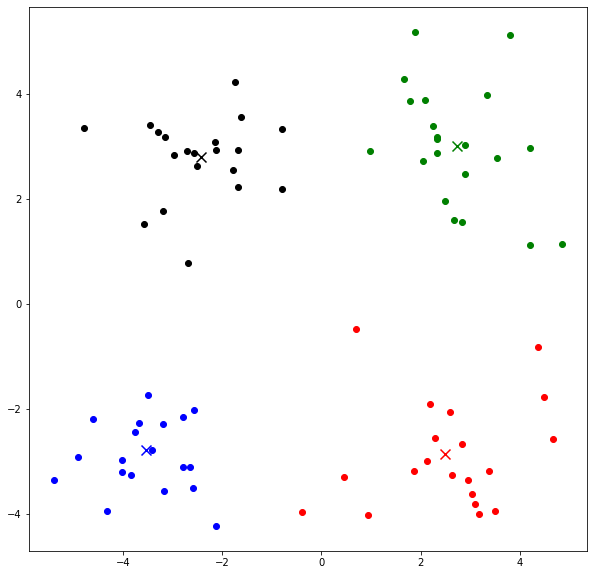

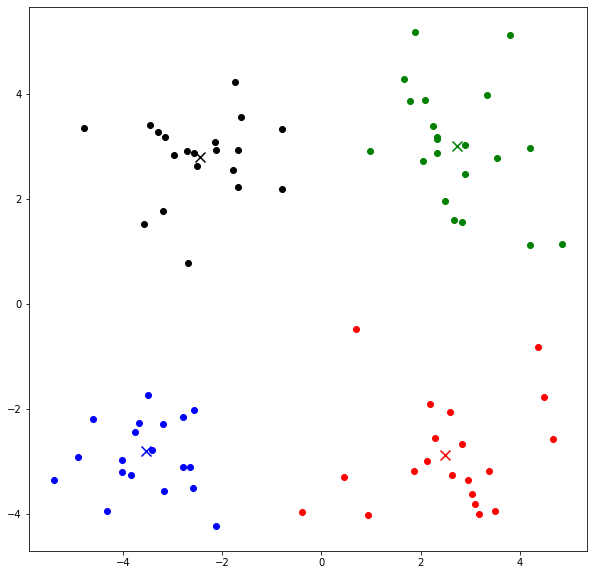

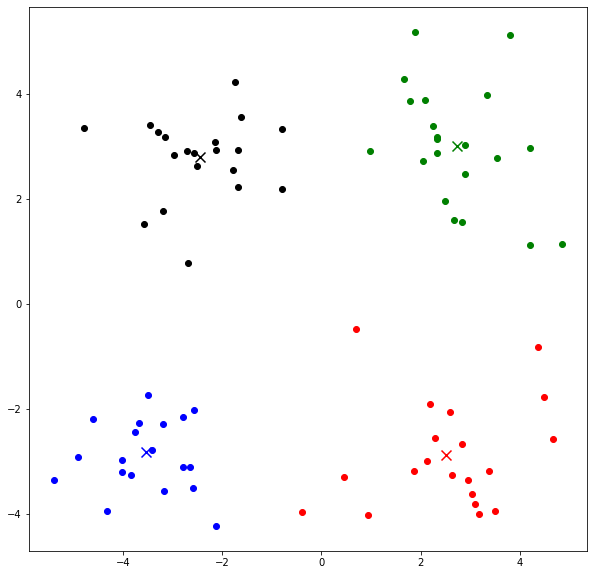

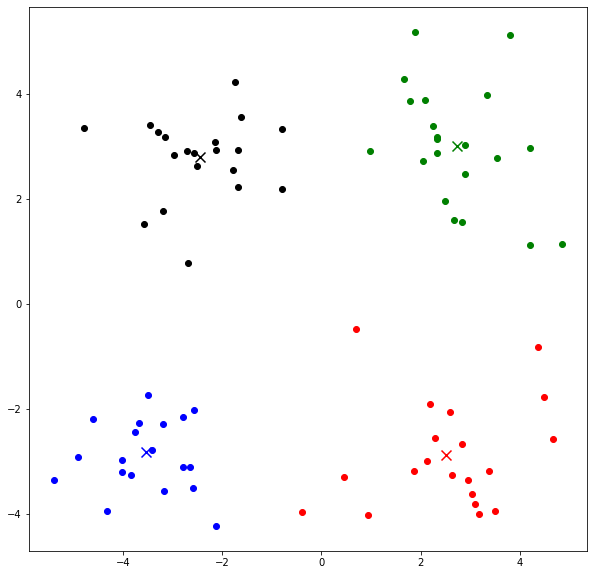

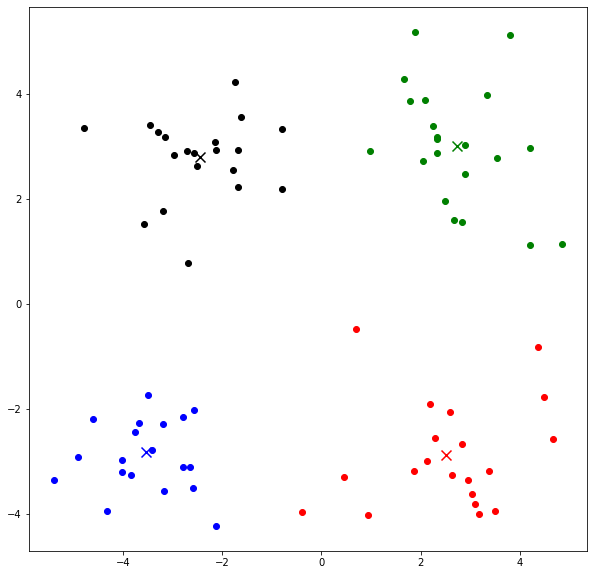

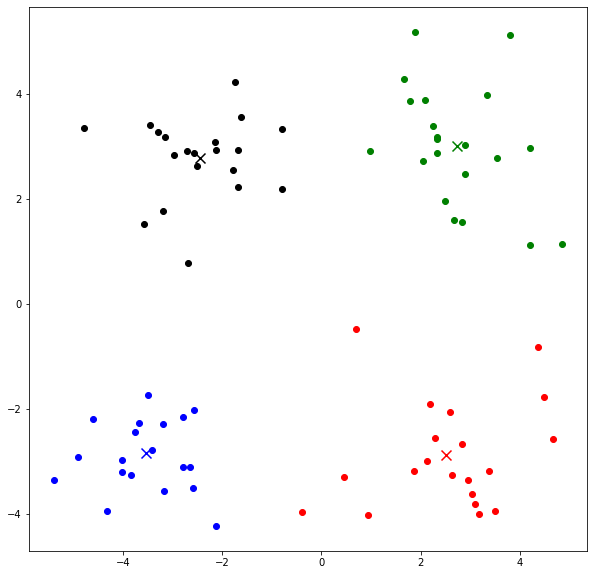

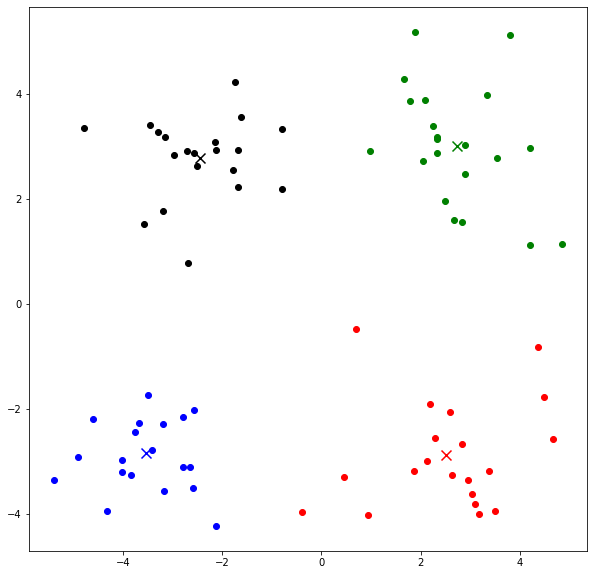

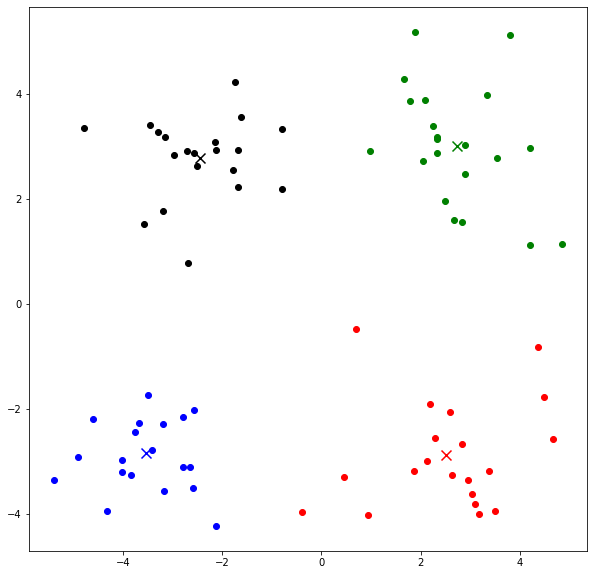

KeyboardInterrupt: 

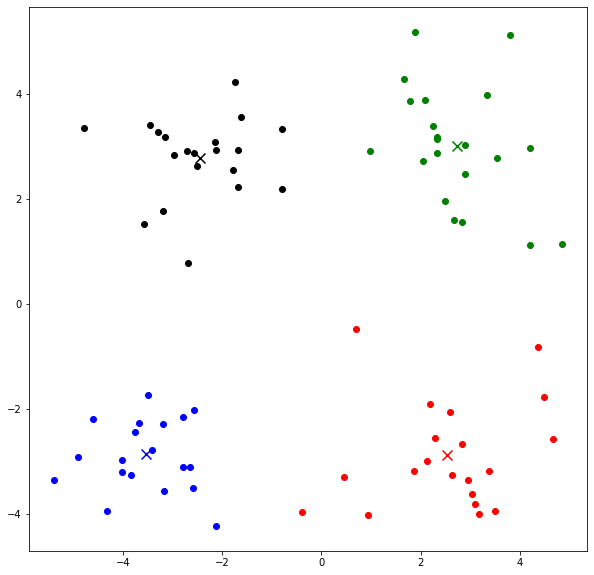

In [5]:
kmeans = KMeans(n_clusters=4, data=x)
kmeans.printCentroids()

# kmeans.showPlot(classification=False
# kmeans.showPlot(classification=True)
kmeans.fit(100, 0.1)
# kmeans.showPlot(classification=True)
